In [5]:
#%matplotlib inline
import pandas as pd
import numpy as np
from plasma.primitives.shots import Shot
import data
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'serif','sans-serif':['Times New Roman']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
#import seaborn as sns
#color = sns.color_palette()

In [6]:
dat = np.load('./temp_data/signal_influence/signal_influence_results_155191_2017-12-01-01-42-33.npz', allow_pickle=False)

In [7]:
shot = dat['original_shot'][()]
plot_signals = shot.signals
importances = dat['importances'][()]
pred = dat['y_prime'][()]

all signals (determines which signals are downloaded and preprocessed):
[Radiated Power Core, Input Beam Torque, Input Power (beam for d3d), Impurity density profile, q95 safety factor, plasma current, stored energy, Locked mode amplitude, plasma current error, internal inductance, Plasma density, Radiated Power Edge, plasma current target, Normalized Beta, plasma current direction, Electron density profile, Electron temperature profile, stored energy time derivative, Radiated Power, Ion temperature profile]


In [8]:
import copy
plot_signals = copy.copy(shot.signals)
plot_signals.append(None)
sigs = [[s] for s in plot_signals[:-3]] + [plot_signals[-3:-1]] + [[plot_signals[-1]    ]]
# sigs[-2][0]
sigs

[[Radiated Power Core],
 [Input Beam Torque],
 [Input Power (beam for d3d)],
 [q95 safety factor],
 [plasma current],
 [stored energy],
 [Locked mode amplitude],
 [plasma current error],
 [internal inductance],
 [Plasma density],
 [Radiated Power Edge],
 [plasma current target],
 [Normalized Beta],
 [plasma current direction],
 [Electron density profile, Electron temperature profile],
 [None]]

In [9]:
importances.keys()

[Normalized Beta,
 Radiated Power Core,
 plasma current error,
 Input Beam Torque,
 Input Power (beam for d3d),
 q95 safety factor,
 plasma current target,
 Radiated Power Edge,
 Locked mode amplitude,
 stored energy,
 None,
 internal inductance,
 plasma current,
 Plasma density,
 plasma current direction,
 Electron temperature profile]

Radiated Power Core
Input Beam Torque
Input Power (beam for d3d)
q95 safety factor
plasma current
stored energy
Locked mode amplitude
plasma current error
internal inductance
Plasma density
Radiated Power Edge
plasma current target
Normalized Beta
plasma current direction
Electron density profile
Electron temperature profile
None
None


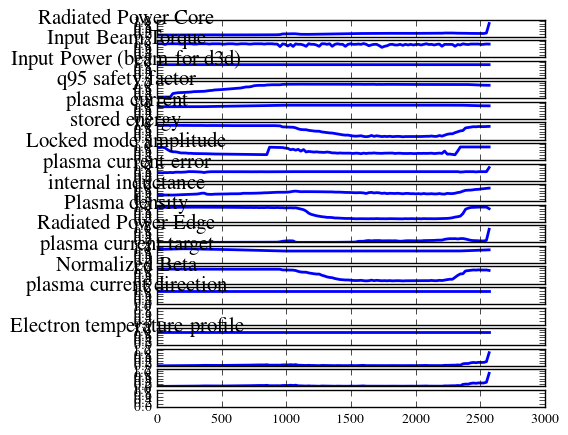

In [17]:
plt.close()
sigs = plot_signals + [None]#plot_signals[:-2] + plot_signals[-1:] + [None]
f,axarr = plt.subplots(len(sigs)+1,1,sharex=True,figsize=(5,5))#, squeeze=False)
for i,sig in enumerate(sigs):
    print(sig)
    if sig is None or (sig is not None and sig in importances.keys()):
        ax = axarr[i]
        ax.plot(importances[sig][0],importances[sig][1],linewidth=2.0)#,linestyle=lss[j],color=colors[j])
        ax.set_ylim([0,1.3])
        if sig is not None:
            h = ax.set_ylabel(sig.description,size=fontsize)
            h.set_rotation(0)
plt.show()
            

In [13]:
labels = dict([(sig,"a") for sig in plot_signals])#"a"]*100
T_min_warn = 30
P_thresh = 0.5

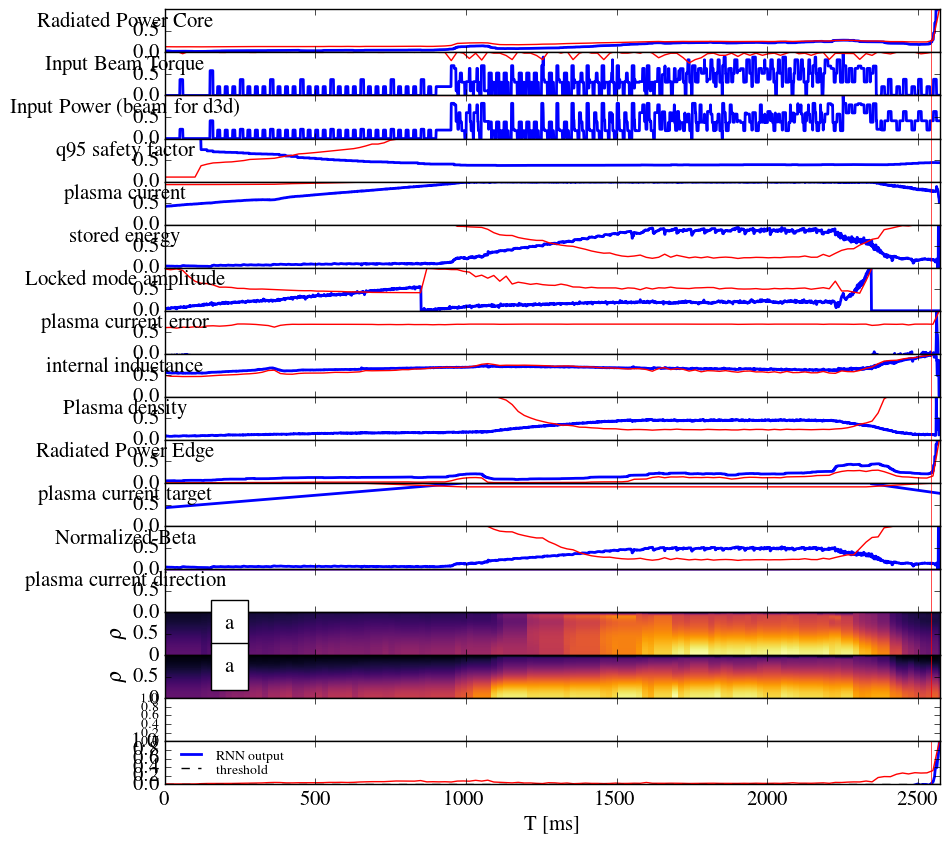

In [15]:
fontsize= 15#25
lower_lim = 0# len(truth)-1000 #len(pred)
plt.close()
colors = ["b","k"]*10
lss = ["-","--"]*10
# f,axarr = plt.subplots(2,1,sharex=True,figsize=(5,5))#, squeeze=False)
# f,axarr = plt.subplots(len(plot_signals)+1,1,sharex=True,figsize=(10,15))#, squeeze=False)
f,axarr = plt.subplots(len(plot_signals)+1,1,sharex=True,figsize=(10,10))#, squeeze=False)
truth = shot.ttd
xx = range(len(pred)) #list(reversed(range(len(pred))))
for i,sig in enumerate(plot_signals):
    if sig is None:
        continue
    ax = axarr[i]
    num_channels = sig.num_channels
    sig_arr = shot.signals_dict[sig]
    if num_channels == 1:
#             ax = axarr[0]
        ax.plot(xx,sig_arr[:,0]/np.max(sig_arr[:,0]),linewidth=2)#linestyle=lss[j],color=colors[j])
        ax.plot(importances[sig][0],(importances[sig][1]),"-r")
#         else:
#             ax.plot(xx,sig_arr[:,0],linewidth=2)#,linestyle=lss[j],color=colors[j],label = labels[sig])
#                 ax.plot([],linestyle="none",label = labels[sig])
        ax.set_ylim([0,1])
        ax.set_yticks([0,0.5])
#         if j == 0:
        h = ax.set_ylabel(sig.description,size=fontsize)
        h.set_rotation(0)
    else:
        ax.imshow(sig_arr[:,:].T, aspect='auto', label = labels[sig],cmap="inferno" )
        ax.set_ylim([0,num_channels])
        ax.text(lower_lim+200, 40, labels[sig], bbox={'facecolor': 'white', 'pad': 10},fontsize=fontsize)
        ax.set_yticks([0,num_channels/2])
        ax.set_yticklabels(["0","0.5"])
        ax.set_ylabel("$\\rho$",size=fontsize)
    ax.legend(loc="best",labelspacing=0.1,fontsize=fontsize,frameon=False)
    ax.axvline(len(truth)-T_min_warn,color='r',linewidth=0.5)
    plt.setp(ax.get_xticklabels(),visible=False)
    plt.setp(ax.get_yticklabels(),fontsize=fontsize)
    f.subplots_adjust(hspace=0)
    #print(sig)
    #print('min: {}, max: {}'.format(np.min(sig_arr), np.max(sig_arr)))
ax = axarr[-1] 
#         ax.semilogy((-truth+0.0001),label='ground truth')
#         ax.plot(-prediction+0.0001,'g',label='neural net prediction')
#         ax.axhline(-P_thresh_opt,color='k',label='trigger threshold')
nn = np.min(pred)
# ax.plot(xx,(truth+0.001)-nn,label='target',linewidth=2)
# ax.axhline(0.4,linestyle="--",color='k',label='threshold')
# ax.axhline(P_thresh-nn,linestyle="--",color='k',label='threshold')
ax.plot(xx,pred/np.max(pred),'b',label='RNN output',linewidth=2)
ax.plot(importances[None][0],importances[None][1],"-r")
# nn0D = np.min(pred0D)
# ax.plot(xx,pred0D-P_thresh0D,'g',label='RNN output [0D only]',linewidth=2)
ax.axhline(0,linestyle="--",color='k',label='threshold')
# ax.axhline(P_thresh-nn,linestyle="--",color='k',label='threshold')
ax.set_ylim([0,1.0])
# ax.set_yticks([0,1])
# if len(truth)-T_max_warn >= 0:
#     ax.axvline(len(truth)-T_max_warn,color='r')#,label='max warning time')
ax.axvline(len(truth)-T_min_warn,color='r',linewidth=0.5)#,label='min warning time')
ax.set_xlabel('T [ms]',size=fontsize)
# ax.axvline(2400)
ax.legend(loc = 'center left',fontsize=fontsize-5,labelspacing=0.1,frameon=False)
plt.setp(ax.get_yticklabels(),fontsize=fontsize)
plt.setp(ax.get_xticklabels(),fontsize=fontsize)
# plt.xlim(0,200)
plt.xlim([lower_lim,len(truth)])#len(truth)])
# plt.savefig("{}.png".format(num),dpi=200,bbox_inches="tight")
plt.show()
# ax.grid()     

## Tryout metrics

In [2]:
dat = np.load('./temp_data/signal_influence/signal_influence_results_2017-11-30-20-13-39.npz', allow_pickle=False)

In [4]:
y_gold = dat['y_gold']
y_prime = dat['y_prime']


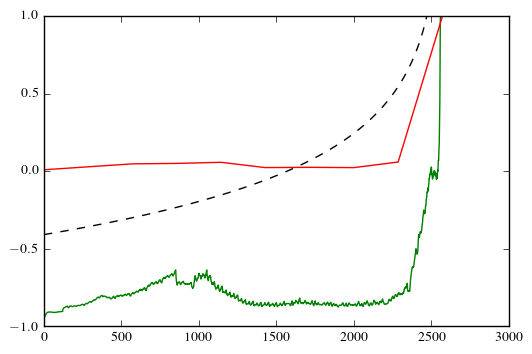

In [97]:
idx = 4
plt.plot(y_gold[idx],"--k")
# plt.plot(y_prime[idx],"-b")
plt.plot(y_prime[-1],"-g")
plt.plot(t_range,differences,"-r")

plt.ylim([-1,1])
plt.show()


In [18]:
t_range = np.linspace(0,len(y_gold[0]),10,dtype=np.int)

In [19]:
t_range

array([   0,  285,  571,  857, 1142, 1428, 1714, 1999, 2285, 2571])

In [95]:
def difference_metric(y_prime,y_prime_orig):
    idx = np.argmax(y_prime_orig) 
    idxmin = np.argmin(y_prime_orig)
    return (y_prime_orig[idx] - y_prime[idx])/(np.max(y_prime_orig) - np.min(y_prime_orig))


def get_importance_measure(y_prime,metric):
    differences = [metric(y_prime[i],y_prime[-1]) for i in range(len(y_prime))]
    return 1.0-np.array(differences)#/np.max(differences)

def l2_metric(y_prime,y_prime_orig):
    xx = (y_prime-y_prime_orig)
    if np.all(xx == 0): return 0.0
    idx = np.where(xx != 0)[0][0]
    return np.mean(np.abs(xx[idx:]))
    
#     return np.max(y_prime_orig - y_prime)

In [96]:
differences = get_importance_measure(y_prime,difference_metric)

In [24]:
np.argmax(t_range)

9